In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv',
                 parse_dates=['date'],
                 index_col=['date'])

# Clean data
clean = (df['value'] > df['value'].quantile(0.025)) & (
  df['value'] < df['value'].quantile(0.975))
df = df[clean]

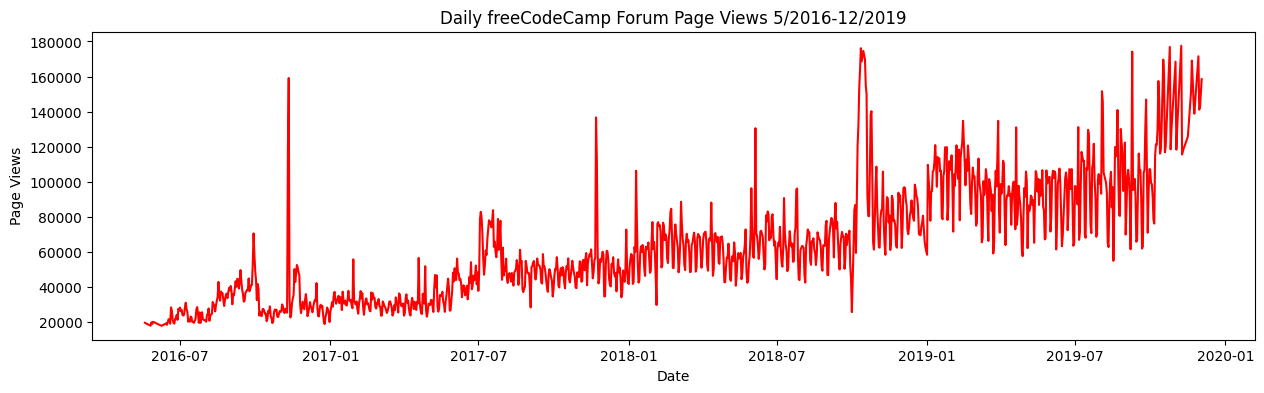

In [3]:
# Draw line plot
fig, ax = plt.subplots(figsize=(15, 4))
plt.plot(df.index, df.value, c='r')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')

# Save image and return fig (don't change this part)
fig.savefig('line_plot.png')

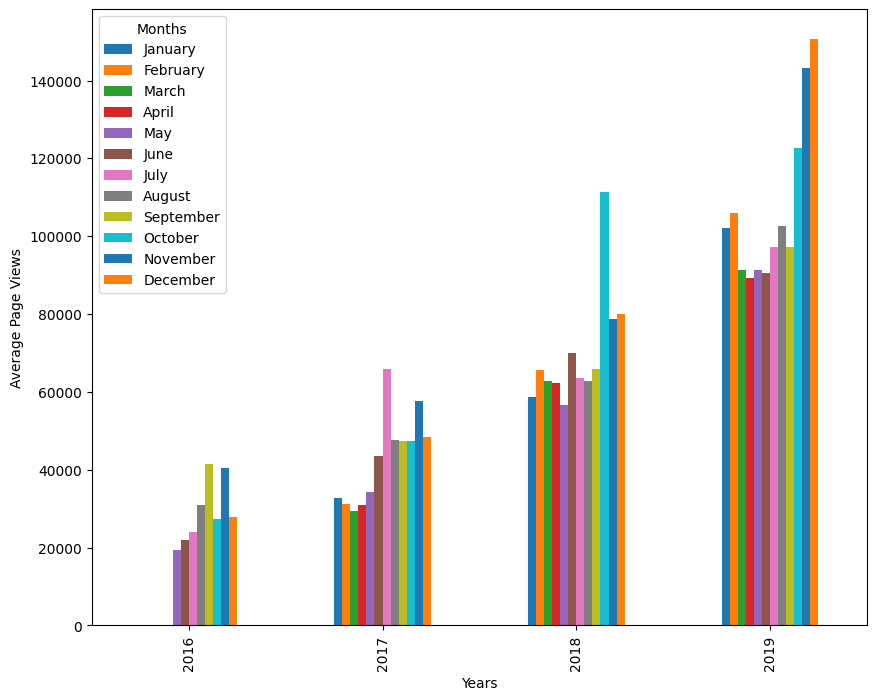

In [4]:

# Copy and modify data for monthly bar plot
df_bar = df.copy()
df_bar = df_bar.groupby([df.index.year, df.index.month]).mean().unstack()

#figure
fig, ax = plt.subplots()
df_bar.plot(y='value', kind='bar', figsize=(10, 8), ax=ax)
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')
ax.legend([
'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
'September', 'October', 'November', 'December'
],
        title='Months')

# Save image and return fig (don't change this part)
fig.savefig('bar_plot.png')

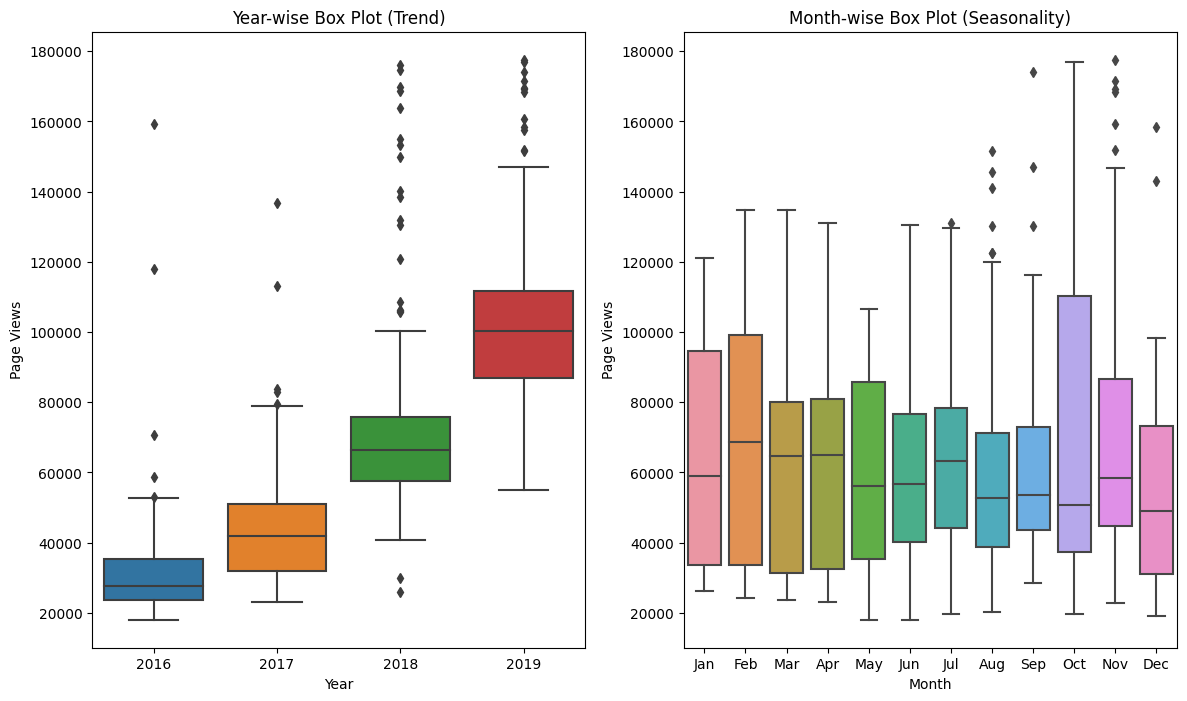

In [5]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

month_order = [
'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
'Nov', 'Dec'
]

# Draw box plots (using Seaborn)
fig, ax = plt.subplots(ncols=2, figsize=(14, 8))
sns.boxplot(ax=ax[0], data=df_box, x='year', y='value')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Page Views')
ax[0].set_title('Year-wise Box Plot (Trend)')

sns.boxplot(ax=ax[1], data=df_box, order=month_order, x='month', y='value')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Page Views')
ax[1].set_title('Month-wise Box Plot (Seasonality)')

# Save image and return fig (don't change this part)
fig.savefig('box_plot.png')

